# 연속확률분포 실습

## 1. Scipy 패키지

In [1]:
# 패키지 import
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
from scipy import stats

# 시각화 패키지
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# os에 따른 Font 깨짐 제거를 위해 Font 지정
import os
if os.name == 'nt':
    font_family = 'Malgun Gothic'
    
# - 값이 깨지는 문제 해결을 위해 파라미터값 설정
sns.set(font=font_family, rc={'axes.unicode_minus': False})

## 2. 연속확률분포

### 1) 정규분포
- 평균을 중심으로 좌우대칭이고 종 모양을 갖는 확률분포

In [2]:
# 기대값이 70이고 표준편차가 10인 정규분포 생성
norm = stats.norm(loc=70, scale=10)

In [3]:
# 구간 내에 숫자를 균일한 간격으로 생성(X축)
# -10 ~ 150까지 2000개 생성
s_x = np.linspace(-10, 150, 2000)

# 확률밀도함수
s_pdf = norm.pdf(s_x)

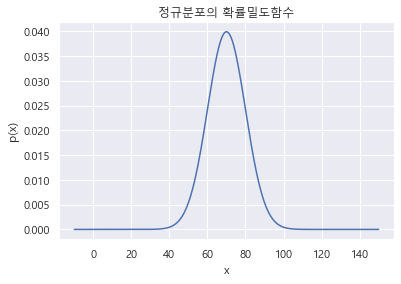

In [4]:
# 정규분포 시각화
plt.plot(s_x, s_pdf)
plt.title('정규분포의 확률밀도함수')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.show()

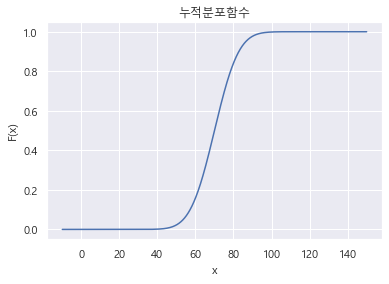

In [5]:
# 누적분포함수
s_cdf = norm.cdf(s_x)

# 누적분포함수 계산
plt.plot(s_x, s_cdf)
plt.title('누적분포함수')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.show()

### 2) 표준정규분포
- 표준화 확률변수 Z에 의해 변환과정을 거쳐 평균이 0이고, 표준편차가 1로 정리된 정규분포

In [6]:
# 기대값이 0이고 표준편차가 1인 정규분포
stan_norm = stats.norm(loc=0, scale=1)

# 구간 내에 숫자를 균일한 간격으로 생성(X축)
# -5 ~ 5까지 1000개 생성
sn_x = np.linspace(-5, 5, 1000)

# 확률밀도함수
sn_pdf = stan_norm.pdf(sn_x)

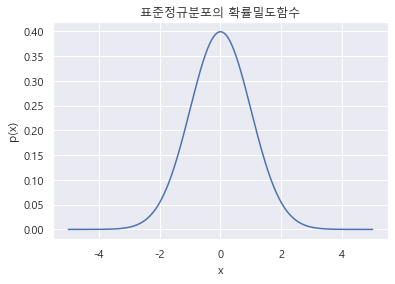

In [7]:
# 정규분포 시각화
plt.plot(sn_x, sn_pdf)
plt.title('표준정규분포의 확률밀도함수')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.show()

### 3) 표준화
- 정규분포를 평균이 0이고, 표준편차가 1인 표준정규분포로 정리하는 과정

In [8]:
# 랜덤 데이터 생성
n_data = np.random.randint(1, 100, size = 1000)
n_data = np.sort(n_data)
n_data.shape

(1000,)

In [9]:
# n_data의 평균과 표준편차 계산
n_mean = np.mean(n_data)
print('mean:', np.mean(n_data))

n_std = np.std(n_data)
print('standard deviation:', np.std(n_data))

mean: 51.03
standard deviation: 27.971648145935198


In [10]:
# 확률밀도함수
norm_n_data = stats.norm(loc = n_mean, scale = n_std)
n_pdf = norm_n_data.pdf(n_data)
n_pdf.shape

(1000,)

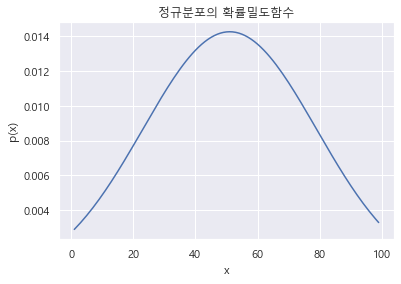

In [11]:
# 정규분포 시각화
plt.plot(n_data, n_pdf)
plt.title('정규분포의 확률밀도함수')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.show()

In [12]:
# 표준화 수행
z_data = list(n_data)
z_data_list = []

for i in z_data:
    z = (i - n_mean) / n_std
    z_data_list.append(z)

In [13]:
# 표준정규분포 확률밀도함수
norm_z_data = stats.norm(loc=0, scale=1)
z_pdf = norm_z_data.pdf(z_data_list)

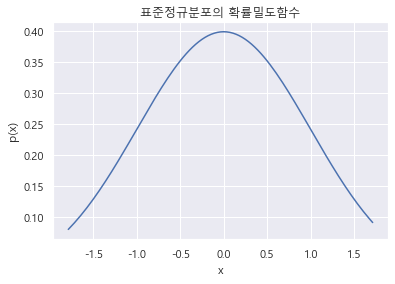

In [14]:
# 표준정규분포 시각화
plt.plot(z_data_list, z_pdf)
plt.title('표준정규분포의 확률밀도함수')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.show()

### 4) 카이제곱분포
- 치우침을 나타내는 분산의 특징을 이용해 한 집단의 분산을 추론하는 분포

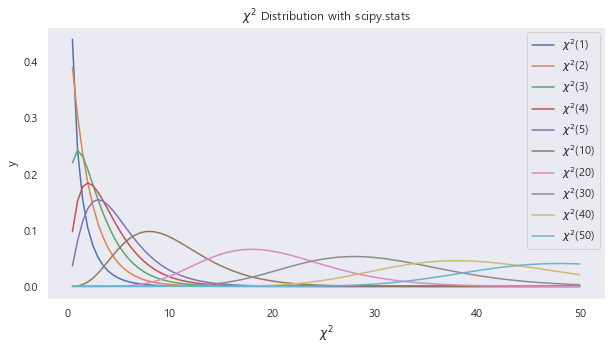

In [19]:
# 카이제곱분포 표현
from scipy.stats import chi2

# 라인스페이스 x축 설정
chi_X = np.linspace(0.5, 50, 100)

# 자유도에 따른 카이제곱분포 시각화
plt.figure(figsize=(10, 5))
for dof in [1, 2, 3, 4, 5, 10, 20, 30, 40, 50] :
    plt.plot(chi_X, stats.chi2(dof).pdf(chi_X),
            label=r'$\chi^2$(' + str(dof) + ')')
    
plt.xlabel(r'$\chi^2$')
plt.ylabel('y')
plt.grid()
plt.title(r'$\chi^2$ Distribution with scipy.stats')
plt.legend()
plt.show()

In [20]:
# 카이제곱분포를 이용한 적합성 검정
# 한 개의 '판매지역' 명목 변수에 값 확인 결과 서울, 인천, 대구, 지역에서 판매
# 교차분석표 생성(자유도 2)

# 관찰도수
x_o = [324, 78, 261]

# 기대도수
x_e = [371, 80, 212]

# 지역별 A제품의 판매수
x_crosstab = pd.DataFrame([x_o, x_e],
                         columns = ['서울', '인천', '대구'],
                         index = ['관찰도수', '기대도수'])

In [21]:
x_crosstab

,서울,인천,대구
관찰도수,324,78,261
기대도수,371,80,212


In [22]:
# 카이제곱 통계량 계산
from scipy.stats import chisquare

result = chisquare(x_o, f_exp = x_e)
result

Power_divergenceResult(statistic=17.329649595687332, pvalue=0.00017254977751013492)

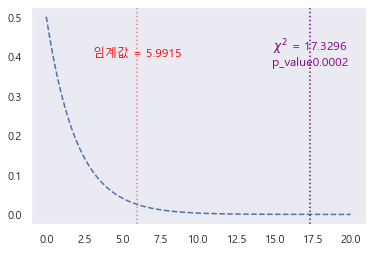

In [26]:
# 위 사례의 카이제곱분포 시각화
from scipy.stats import chi2

# 자유도 2
dof = 2
x_chi_l = np.linspace(0, 20, 201)
pdf_chi = chi2(dof).pdf(x_chi_l)

# 유의수준 : 5%
x95_c = chi2(dof).ppf(.95)
plt.plot(x_chi_l, pdf_chi, 'b--')

# 95%의 임계값 표시
plt.axvline(x=x95_c, color='lightcoral', linestyle=':')
plt.text(x95_c, .4, '임계값 = ' + str(round(x95_c, 4)),
        horizontalalignment='center', color='red')

# 위에서 구한 카이분포 통계값 = result[0]
plt.axvline(x=result[0], color='purple', linestyle=':')
plt.text(result[0], .4, r'$\chi^2$ = ' + str(round(result[0], 4)), va = 'bottom',
        horizontalalignment='center', color='purple')
plt.text(result[0], .4, 'p_value' + str(round(result[1], 4)), va='top',
        horizontalalignment='center', color='purple')
plt.grid()
plt.show()